In [69]:
from sklearn.datasets import make_blobs
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

In [70]:
def gen_inlier(n_samples, center=[2.5, 9.0, 0.0], std=0.18, seed=42):
    if seed=="rand":
        seed=None
    X_in, _ = make_blobs(
        n_samples=n_samples,
        n_features=3,
        centers=[center],
        cluster_std=std,
        random_state=seed
    )
    return np.hstack([X_in, np.full((n_samples, 1), fill_value=0)])

def gen_outlier_ring(n_samples, inner_radius, outer_radius, center=[2.5, 9.0, 0.0], seed=42):
    if seed == "rand":
        seed = None
    rng = np.random.default_rng(seed)
    
    center = np.array(center)
    # Random directions (on unit sphere)
    directions = rng.normal(size=(n_samples, 3))
    directions /= np.linalg.norm(directions, axis=1)[:, None]
    
    # Random radii between inner and outer radius
    radii = rng.uniform(inner_radius, outer_radius, size=n_samples)
    
    # Points = center + radius * direction
    X_out = center + directions * radii[:, None]
    
    return np.hstack([X_out, np.full((n_samples, 1), fill_value=1)])

In [71]:
def rescale_features(X):
    temp = X[:, 0] * 10 + 150
    humidity = X[:, 1] * 5 + 25
    sound_volume = X[:, 2] * 8 + 90

    return np.column_stack([temp, humidity, sound_volume])

In [72]:
inlier_init = gen_inlier(n_samples=800, seed=42)
outlier_init = gen_outlier_ring(n_samples=200, seed=42, inner_radius=0.3, outer_radius=0.5)

X_in, y_in = inlier_init[:, :-1], inlier_init[:, -1:]
X_out, y_out = outlier_init[:, :-1], outlier_init[:, -1:]

X_in = rescale_features(X_in)
X_out = rescale_features(X_out)

inlier_scaled = np.hstack([X_in, y_in])
outlier_scaled = np.hstack([X_out, y_out])

init_data = pd.DataFrame(
    np.vstack((inlier_scaled, outlier_scaled)),
    columns=["temp", "humidity", "sound_volume", "label"]
)
init_data = init_data.sample(frac=1).reset_index(drop=True)
init_data["id"] = init_data.index

init_data.to_csv("init_data.csv", index=False)

In [73]:
def plot_gen_data(data):

    fig = plt.figure(figsize=(5, 5), layout="constrained")
    ax = fig.add_subplot(projection='3d')

    ax.scatter(data["temp"], data["humidity"], data["sound_volume"], c=data["label"], cmap="viridis_r")
    ax.set_xlabel("Temperature")
    ax.set_ylabel("Humidity")
    ax.set_zlabel("Sound Volume")

    plt.tight_layout()
    plt.show()

C:\Users\Edi\AppData\Local\Temp\ipykernel_9400\855928144.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


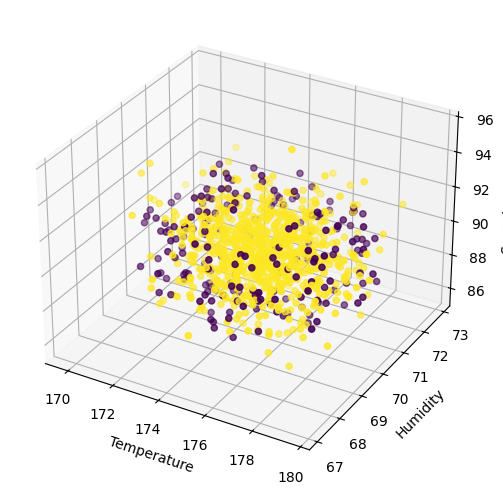

In [74]:
plot_gen_data(init_data)

In [75]:
inlier_new = gen_inlier(n_samples=1700, seed=42)
outlier_new = gen_outlier_ring(n_samples=300, seed=42, inner_radius=0.5, outer_radius=1.0)

X_in, y_in = inlier_new[:, :-1], inlier_new[:, -1:]
X_out, y_out = outlier_new[:, :-1], outlier_new[:, -1:]

X_in = rescale_features(X_in)
X_out = rescale_features(X_out)

inlier_scaled = np.hstack([X_in, y_in])
outlier_scaled = np.hstack([X_out, y_out])

new_data = pd.DataFrame(
    np.vstack((inlier_scaled, outlier_scaled)),
    columns=["temp", "humidity", "sound_volume", "label"]
)
new_data = new_data.sample(frac=1).reset_index(drop=True)
new_data["id"] = new_data.index

new_data.to_csv("new_data.csv", index=False)

C:\Users\Edi\AppData\Local\Temp\ipykernel_9400\855928144.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


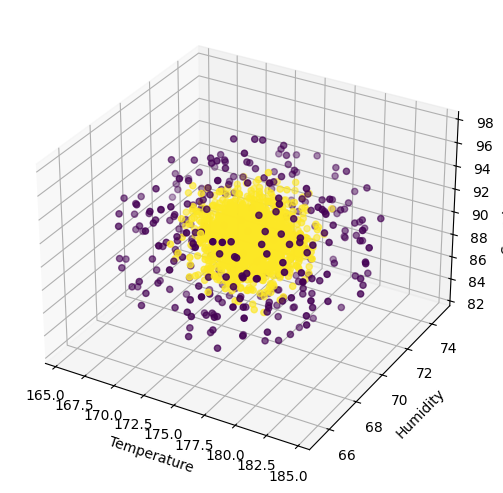

In [76]:
plot_gen_data(new_data)